# Images for Mike
Takes an image, navigates it, and then saves the navigated image to a fits file.

In [1]:
#RUN ME BEFORE ANYTHING ELSE!!! I import all of the required modules and functions!!
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools.mapping import *
from tools.image import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'viridis'
xcol = 'red'
lvls = 1000
print("Graphical Parameters initialised...")
from scipy import ndimage
from photutils import centroid_com
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


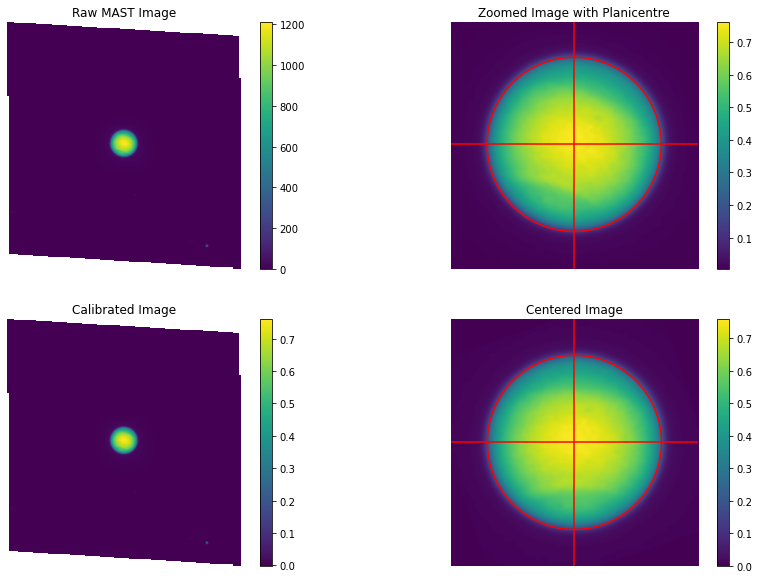

Planicentre is at: (166.96173403206558, 166.65272661235926, 117.75869999999999)


In [2]:
Year = '2020'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ie0l24pdq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

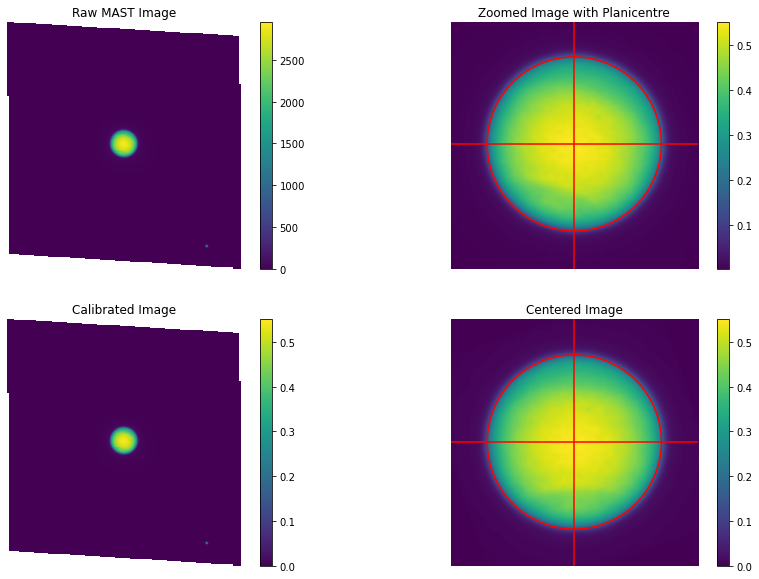

Planicentre is at: (166.82693172169223, 166.1300384596174, 117.75874999999999)


In [3]:
Year = '2020'
wavlng = '547'
SolFlux = 1859.82
Filename = 'ie0l24peq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

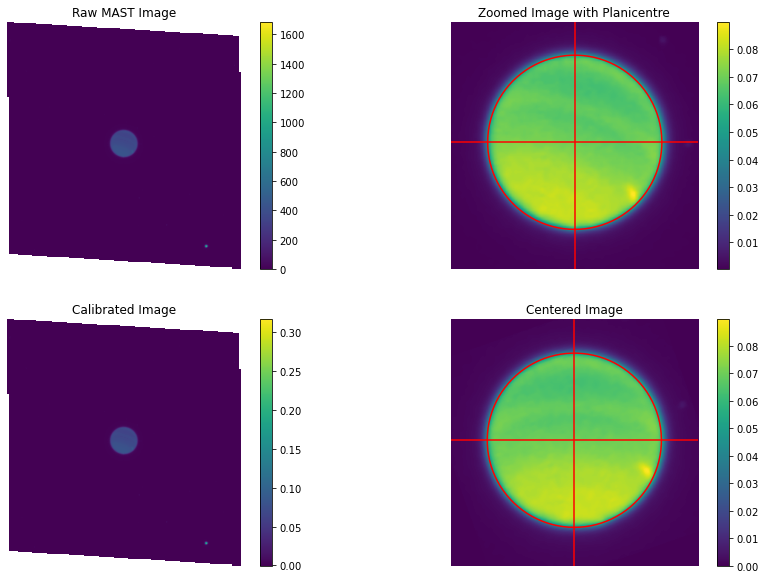

Planicentre is at: (166.80308403663136, 163.772400790088, 117.75885)


In [4]:
Year = '2020'
wavlng = '763'
SolFlux = 1541.91
Filename = 'ie0l24pgq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

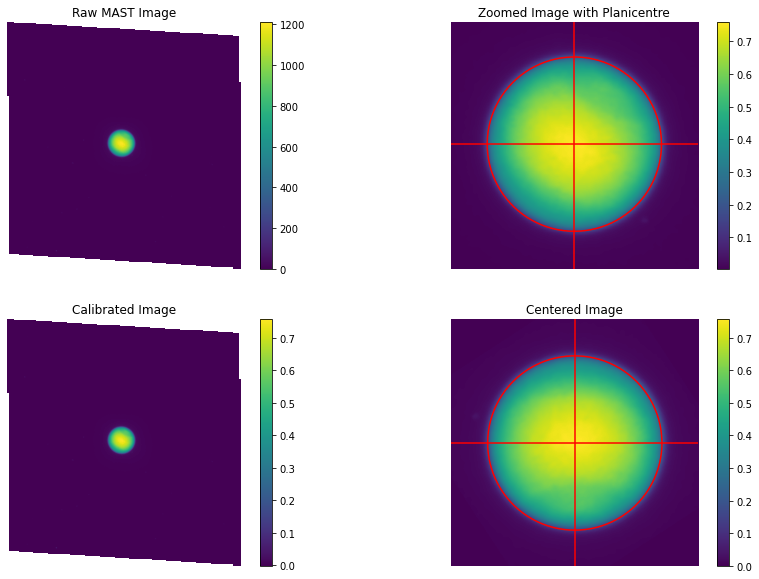

Planicentre is at: (167.44621647386185, 167.4885991806869, 117.80664999999999)


In [5]:
Year = '2019'
wavlng = '467'
SolFlux = 2019.04
Filename = 'iduy25mnq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

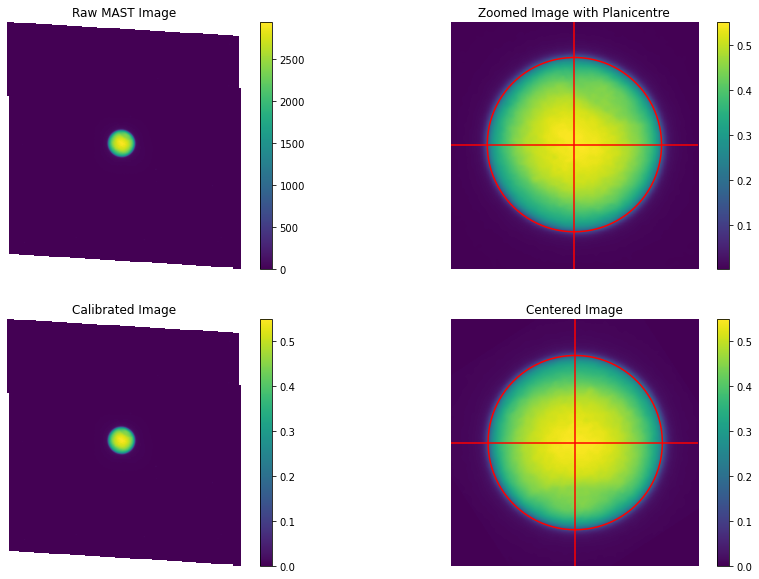

Planicentre is at: (168.01277630305887, 166.96660795355876, 117.80664999999999)


In [6]:
Year = '2019'
wavlng = '547'
SolFlux = 1859.82
Filename = 'iduy25moq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

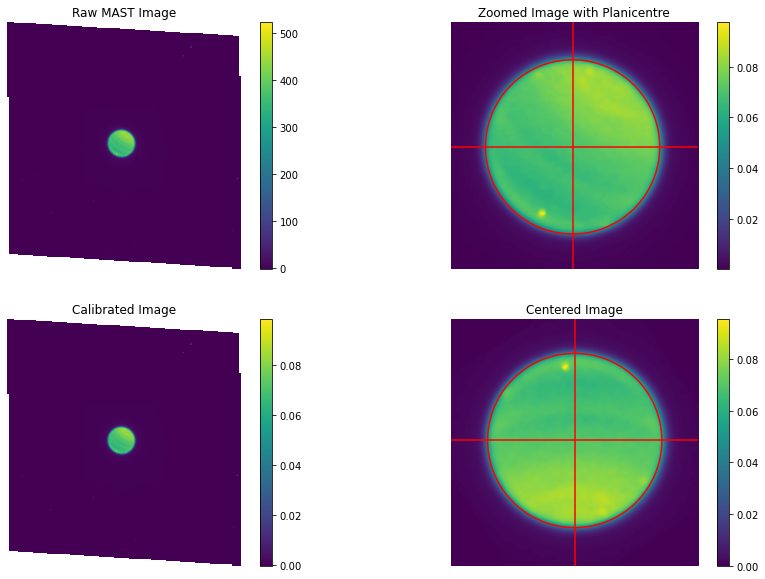

Planicentre is at: (167.33254865034527, 164.10420590081608, 117.8066)


In [7]:
Year = '2019'
wavlng = '763'
SolFlux = 1541.91
Filename = 'iduy25mqq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

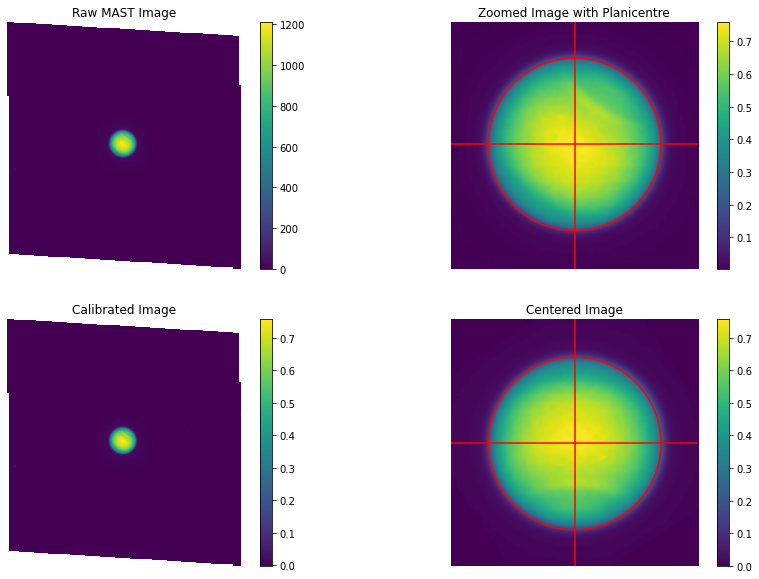

Planicentre is at: (166.3105586741513, 167.0832397754611, 116.0701)


In [8]:
Year = '2018'
wavlng = '467'
SolFlux = 2019.04
Filename = 'idg263cvq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

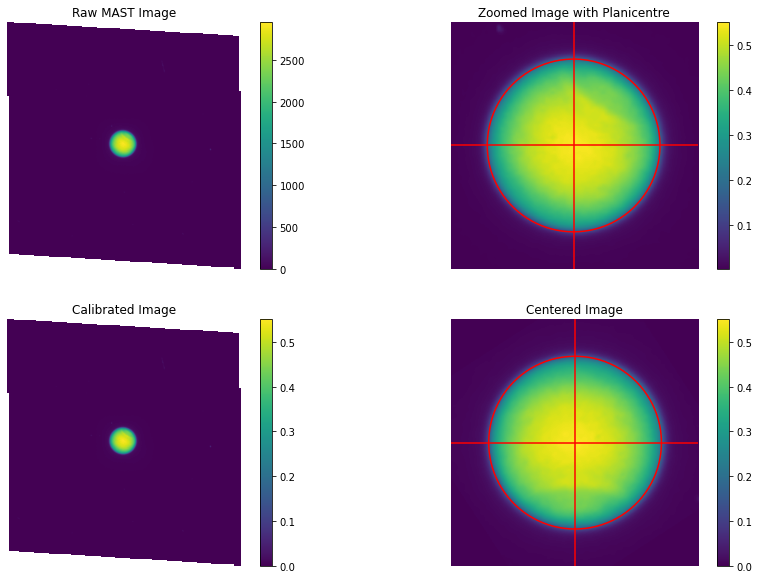

Planicentre is at: (166.80664970836867, 166.00313471569157, 116.07005)


In [9]:
Year = '2018'
wavlng = '547'
SolFlux = 1859.82
Filename = 'idg263cwq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

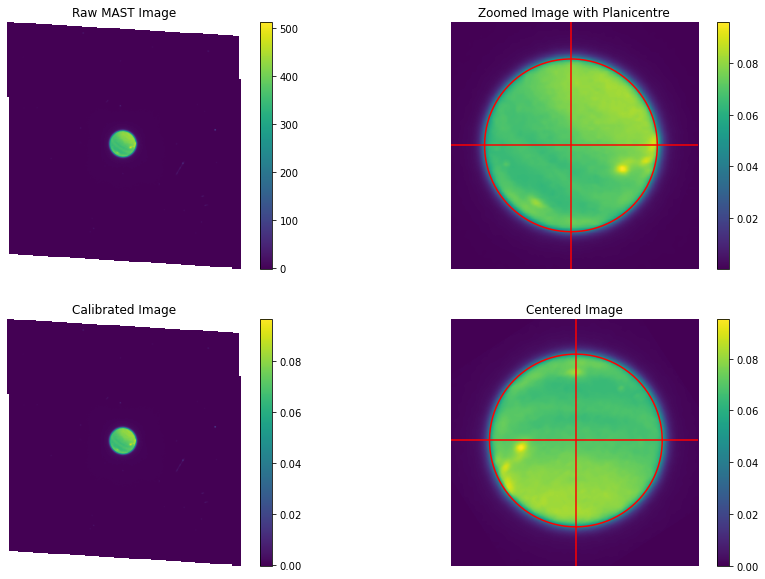

Planicentre is at: (167.85692548874954, 163.12776650682406, 116.06994999999999)


In [10]:
Year = '2018'
wavlng = '763'
SolFlux = 1541.91
Filename = 'idg263cyq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

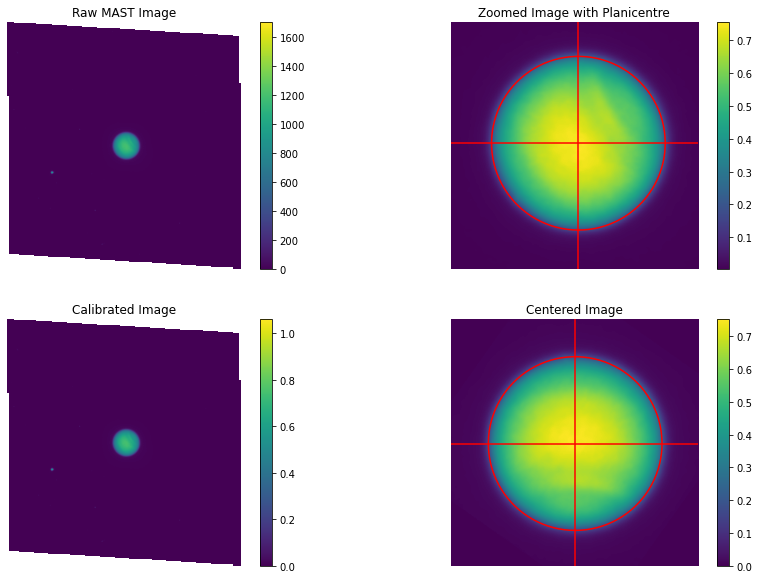

Planicentre is at: (167.96624395345796, 168.25292195058177, 117.3953)


In [11]:
Year = '2017'
wavlng = '467'
SolFlux = 2019.04
Filename = 'id9922buq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

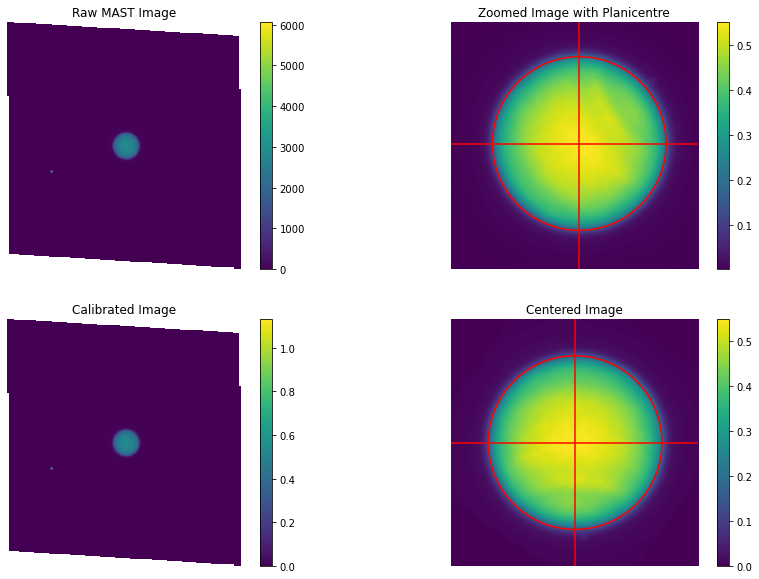

Planicentre is at: (167.90991490004532, 166.96935898081475, 117.39524999999999)


In [12]:
Year = '2017'
wavlng = '547'
SolFlux = 1859.82
Filename = 'id9922bvq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

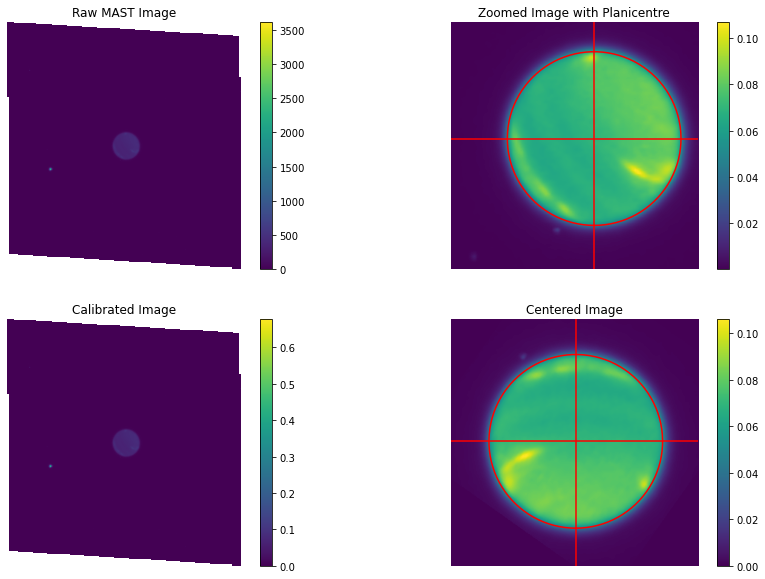

Planicentre is at: (168.7740520847389, 165.2601088472091, 117.3952)


In [13]:
Year = '2017'
wavlng = '763'
SolFlux = 1541.91
Filename = 'id9922bxq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

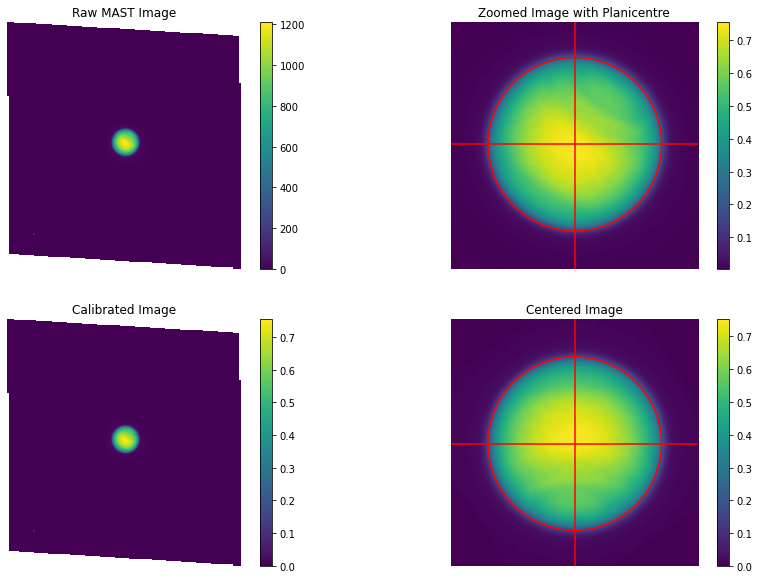

Planicentre is at: (167.35462994123586, 168.29832509254706, 117.36705)


In [14]:
Year = '2016'
wavlng = '467'
SolFlux = 2019.04
Filename = 'icwy24jbq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

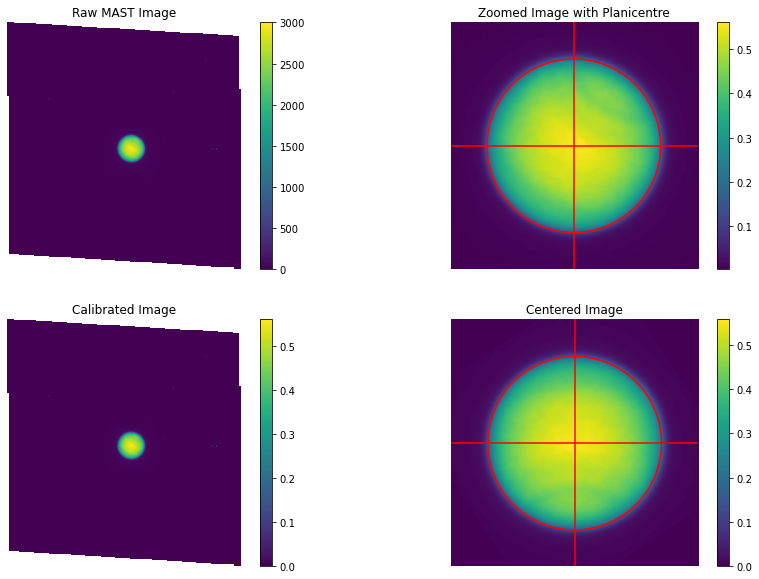

Planicentre is at: (167.3200788777395, 167.7786181418801, 117.36685)


In [15]:
Year = '2016'
wavlng = '547'
SolFlux = 1859.82
Filename = 'icwy24jhq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

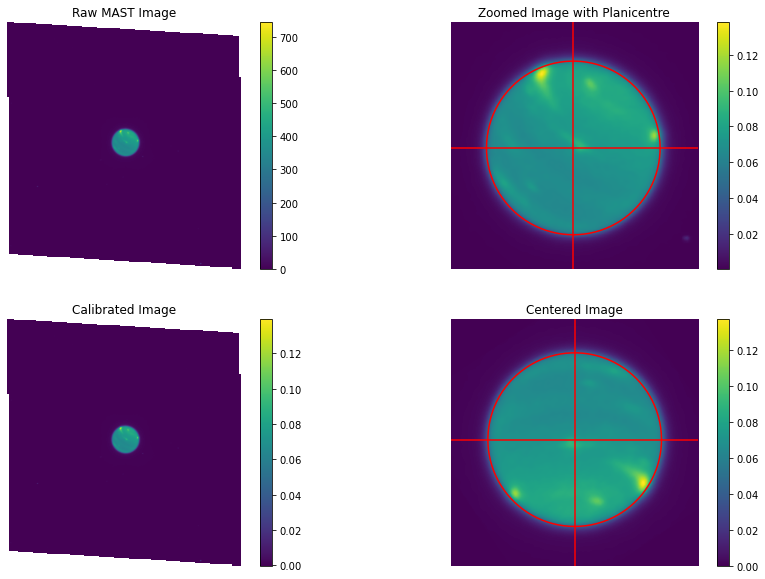

Planicentre is at: (167.29943451911595, 162.94836325951292, 117.36694999999999)


In [16]:
Year = '2016'
wavlng = '763'
SolFlux = 1541.91
Filename = 'icwy24jeq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

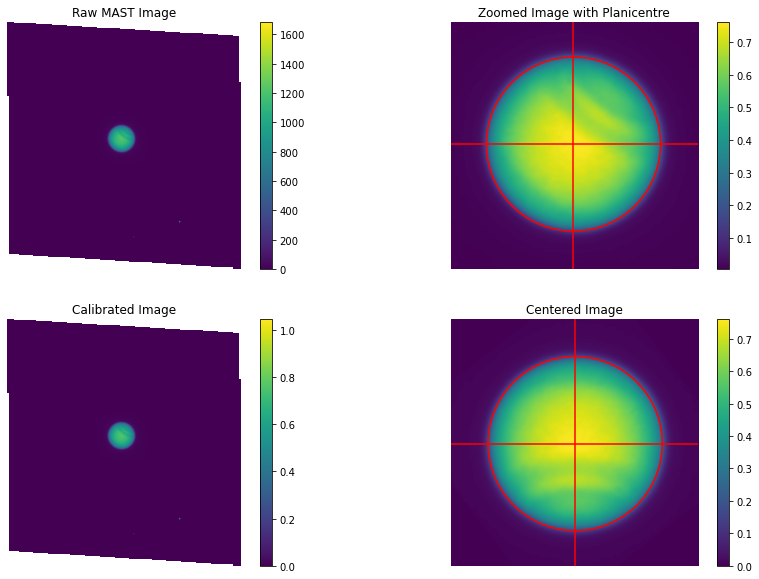

Planicentre is at: (168.01808871963772, 168.28586867023466, 117.72469999999998)


In [17]:
Year = '2015'
wavlng = '467'
SolFlux = 2019.04
Filename = 'icpf30gqq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

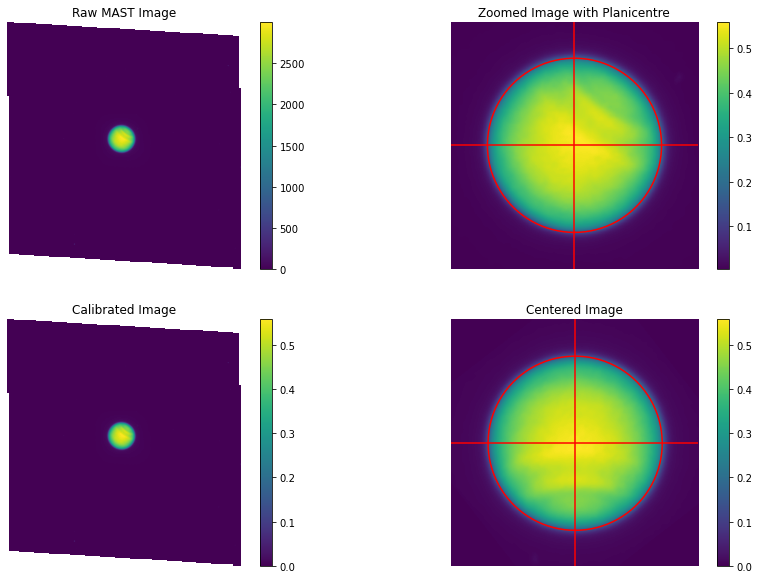

Planicentre is at: (167.92681289167413, 167.8145578434298, 117.72469999999998)


In [18]:
Year = '2015'
wavlng = '547'
SolFlux = 1859.82
Filename = 'icpf30grq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

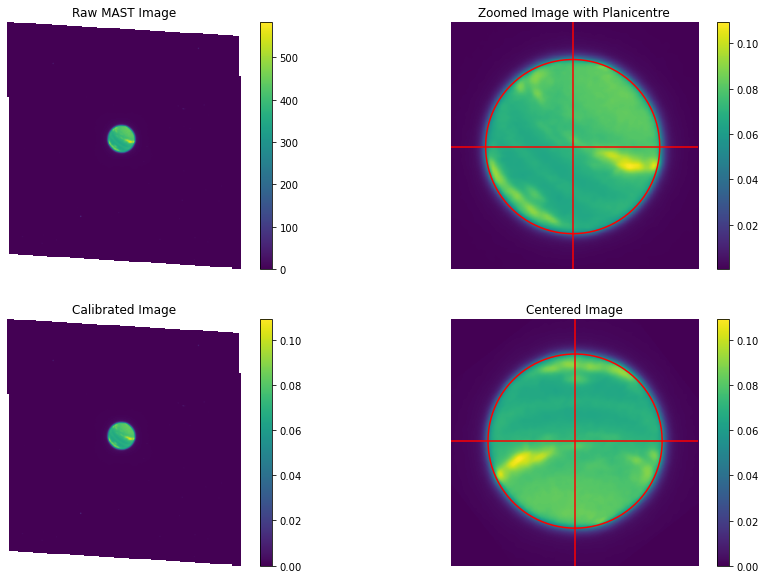

Planicentre is at: (167.8152086498079, 164.9049682780806, 117.72465000000001)


In [19]:
Year = '2015'
wavlng = '763'
SolFlux = 1541.91
Filename = 'icpf30gtq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

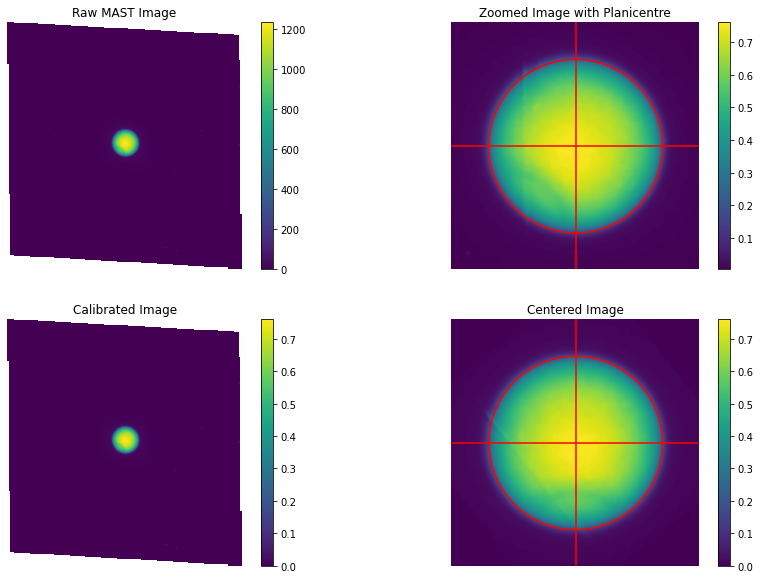

Planicentre is at: (165.4529646370646, 165.46562084551982, 115.99575)


In [20]:
Year = '2011'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ibol04etq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

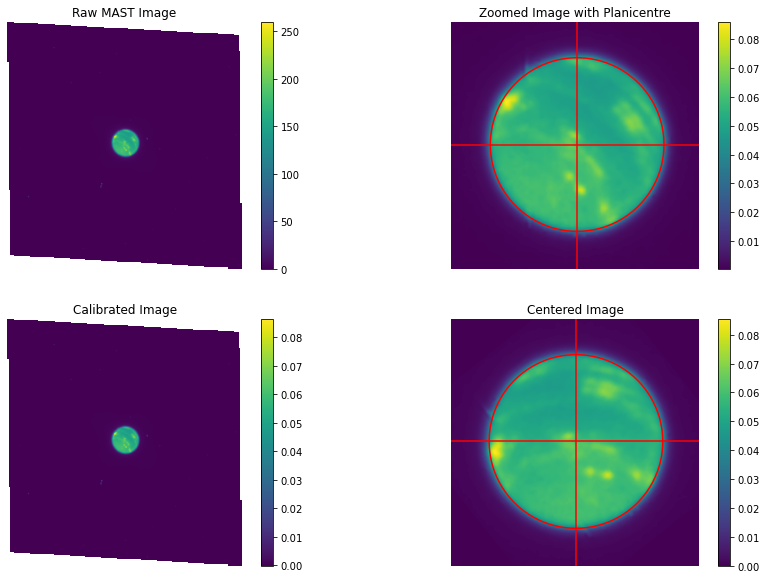

Planicentre is at: (165.76502732240436, 163.4801198070284, 115.99544999999999)


In [21]:
#In Year 2011, I was only able to find images in the 467 and 845 nm wavelength bands, sorry!
Year = '2011'
wavlng = '845'
SolFlux = 1023.65
Filename = 'ibol04epq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

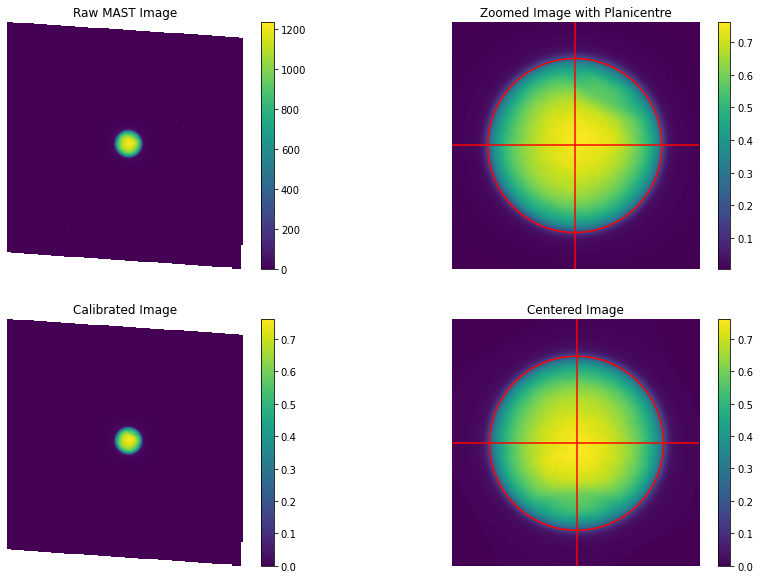

Planicentre is at: (167.91342866024246, 167.8652730287017, 117.66959999999999)


In [22]:
Year = '2010'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ib2s16xsq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

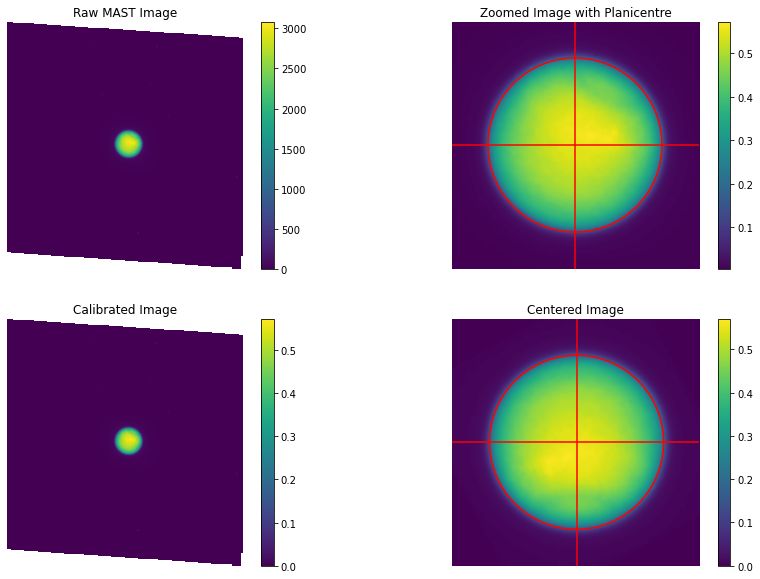

Planicentre is at: (168.01583146347545, 166.55896285215658, 117.66959999999999)


In [23]:
Year = '2010'
wavlng = '547'
SolFlux = 1859.82
Filename = 'ib2s16xtq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

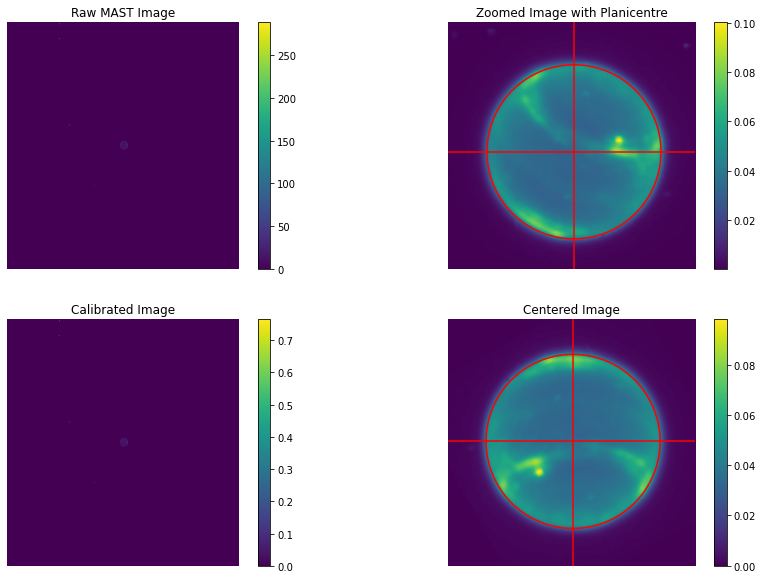

Planicentre is at: (168.3918407310705, 165.31281549173195, 117.66965)


In [24]:
Year = '2010'
wavlng = '727'
SolFlux = 1339.23
Filename = 'ib2s16xxq_drz'
Interp = True
croppix = 800
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

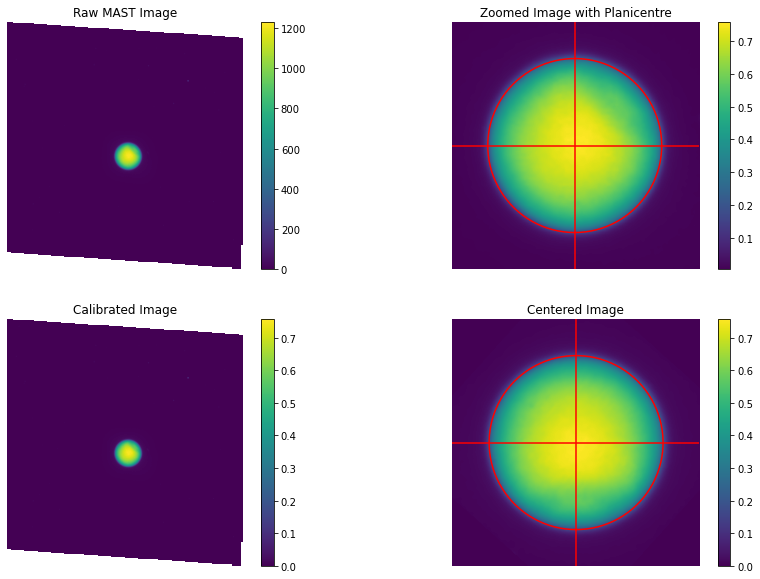

Planicentre is at: (167.36586501163694, 166.9505301267132, 117.591)


In [25]:
Year = '2009'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ib2s04jvq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

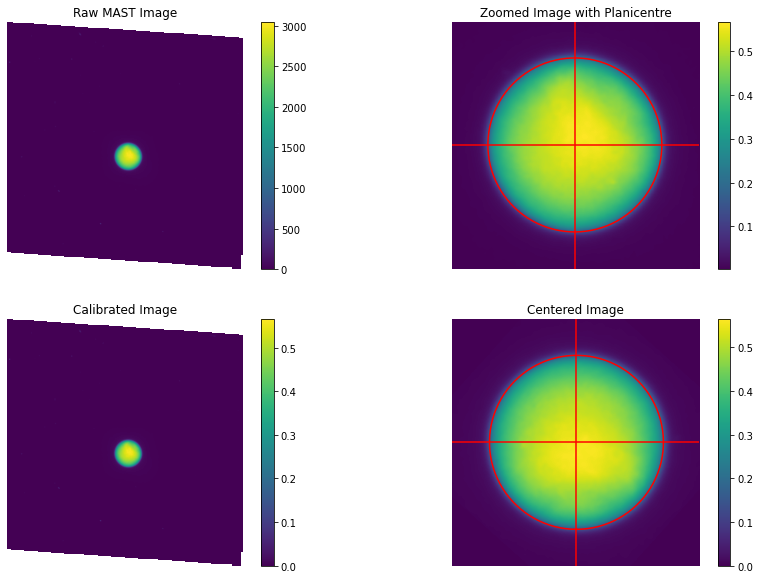

Planicentre is at: (167.82986310251104, 166.60329651148294, 117.591)


In [26]:
Year = '2009'
wavlng = '547'
SolFlux = 1859.82
Filename = 'ib2s04jwq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

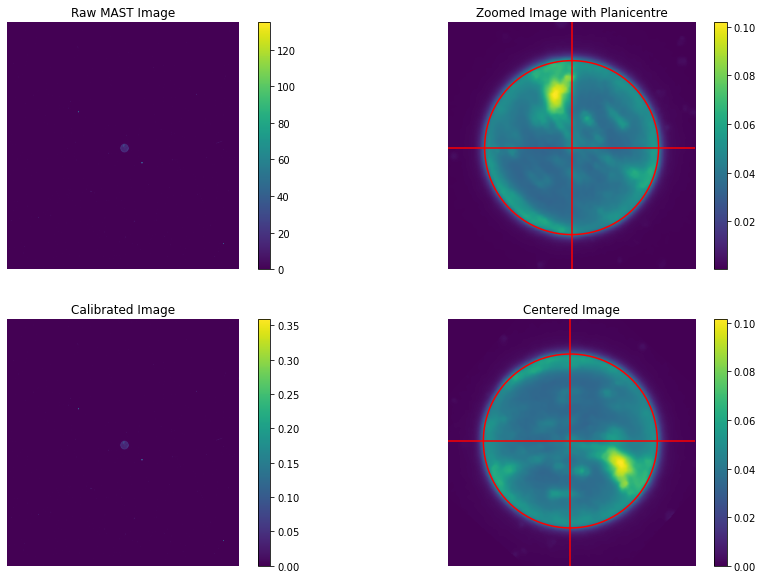

Planicentre is at: (164.6687282820115, 164.75590620014424, 117.59094999999999)


In [27]:
Year = '2009'
wavlng = '727'
SolFlux = 1339.23
Filename = 'ib2s04k1q_drz'
Interp = True
croppix = 800
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop, iterations=3)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

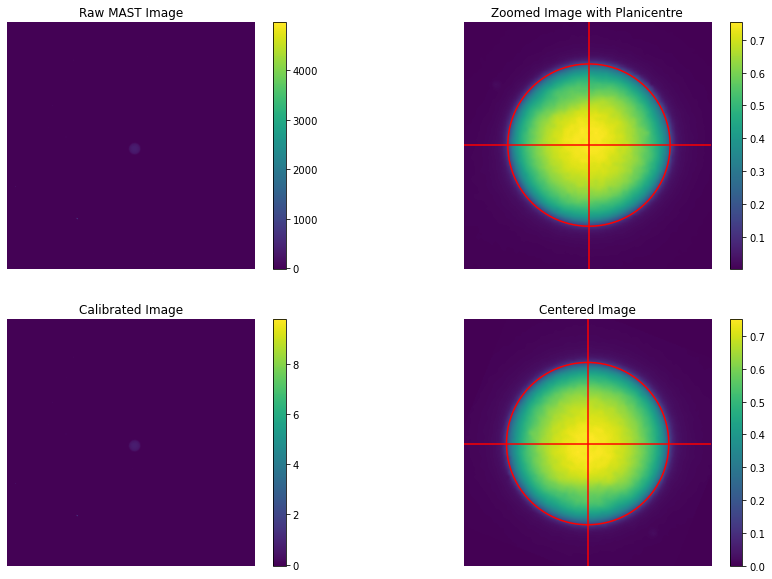

Planicentre is at: (142.914197276104, 144.04894758563765, 93.93487999999999)


In [28]:
Year = '2008'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_11156_47_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

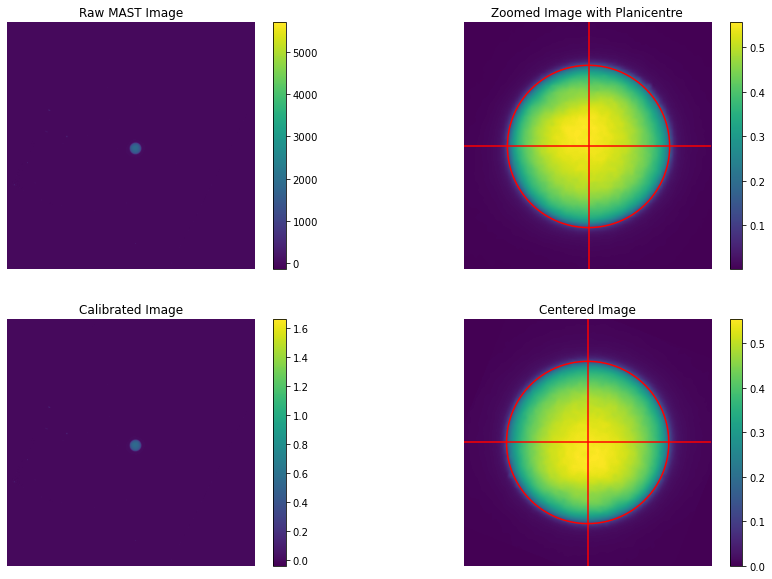

Planicentre is at: (142.93330411570182, 142.75489063309294, 93.93496)


In [29]:
Year = '2008'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_11156_47_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

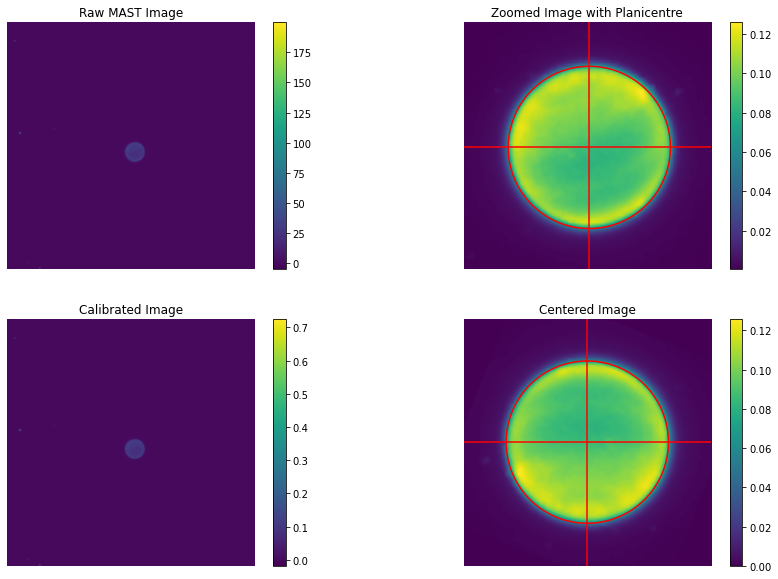

Planicentre is at: (142.50498432491457, 142.37549755186868, 93.93471999999998)


In [30]:
Year = '2008'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_11156_47_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

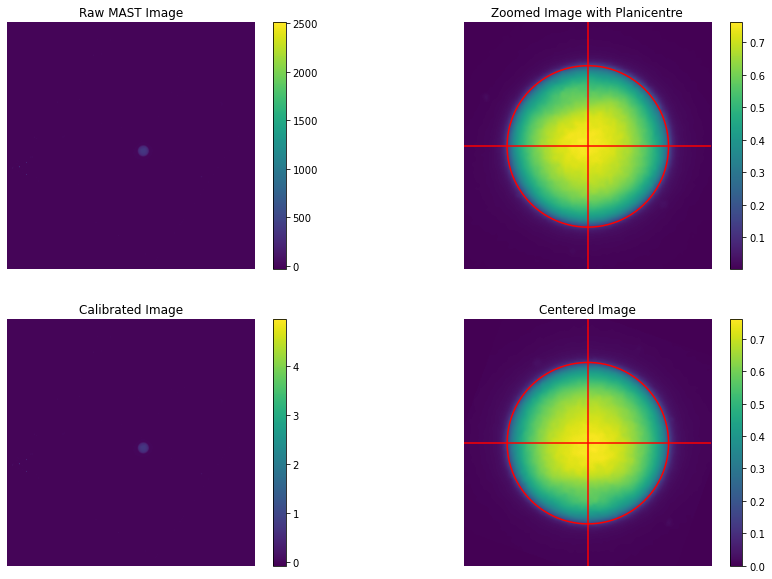

Planicentre is at: (144.18207202398062, 144.5555783681682, 94.086)


In [31]:
Year = '2007'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_11156_03_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

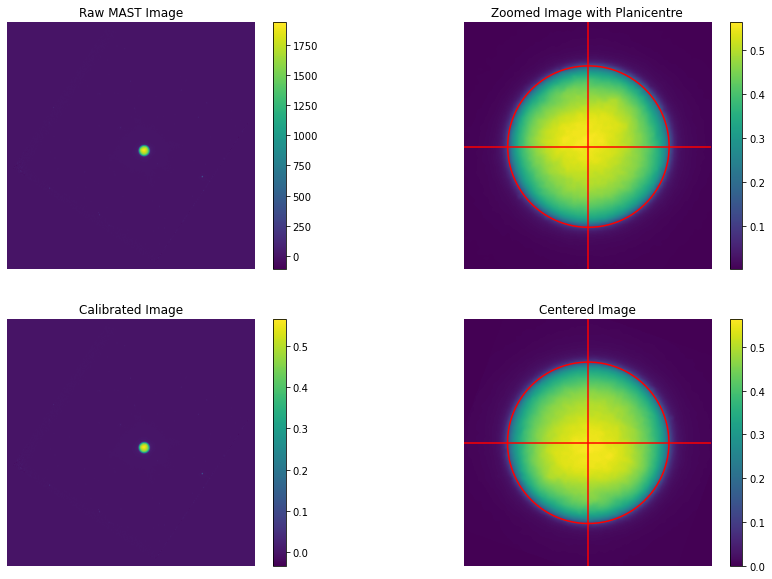

Planicentre is at: (144.59437224275663, 144.13234768093477, 94.08604)


In [32]:
Year = '2007'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_11156_03_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

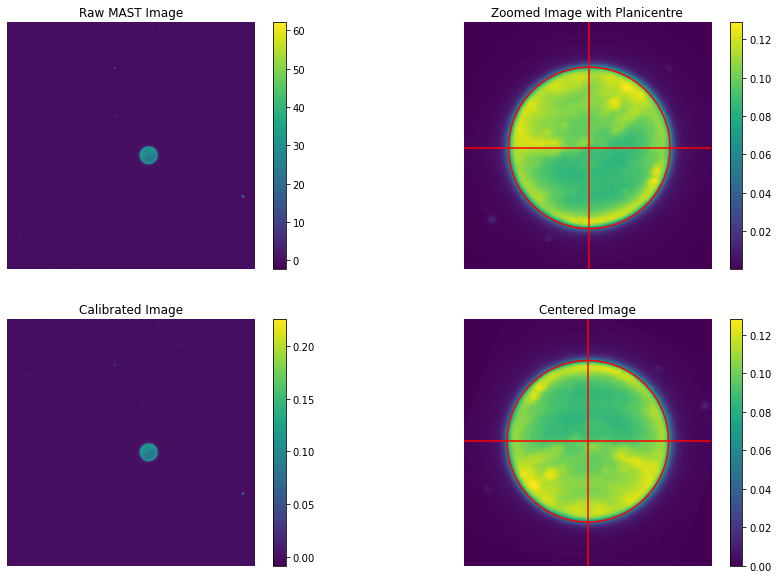

Planicentre is at: (144.11692068868192, 142.36346316680778, 94.08595999999999)


In [33]:
Year = '2007'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_11156_03_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

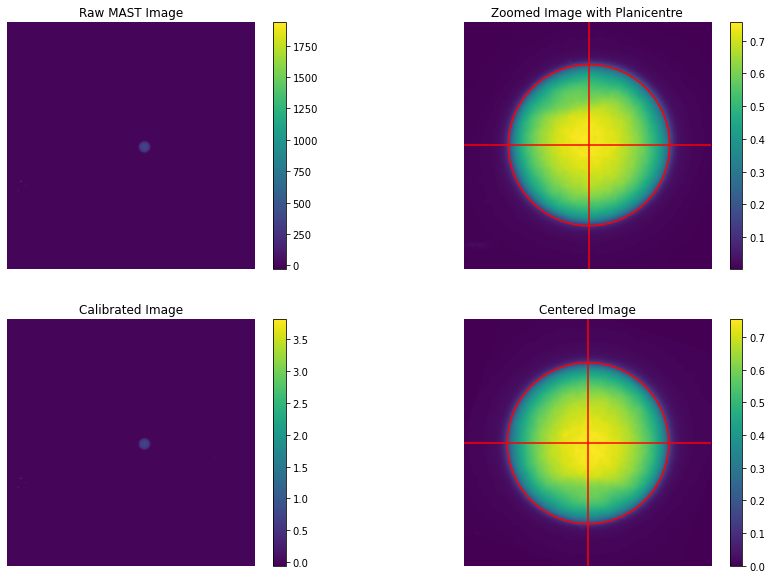

Planicentre is at: (143.34486067078257, 143.56211413315535, 93.35679999999999)


In [34]:
Year = '2006'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_10534_19_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

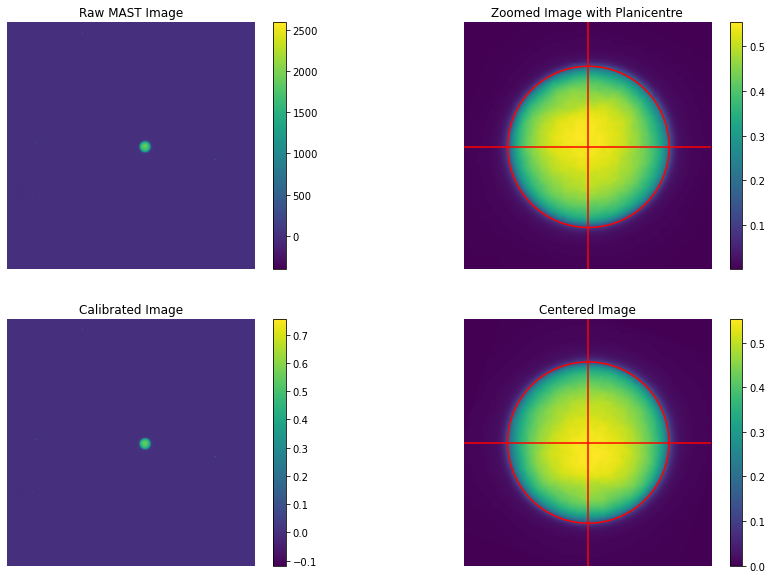

Planicentre is at: (143.65118533177173, 142.85990065021608, 93.35687999999999)


In [35]:
Year = '2006'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_10534_19_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

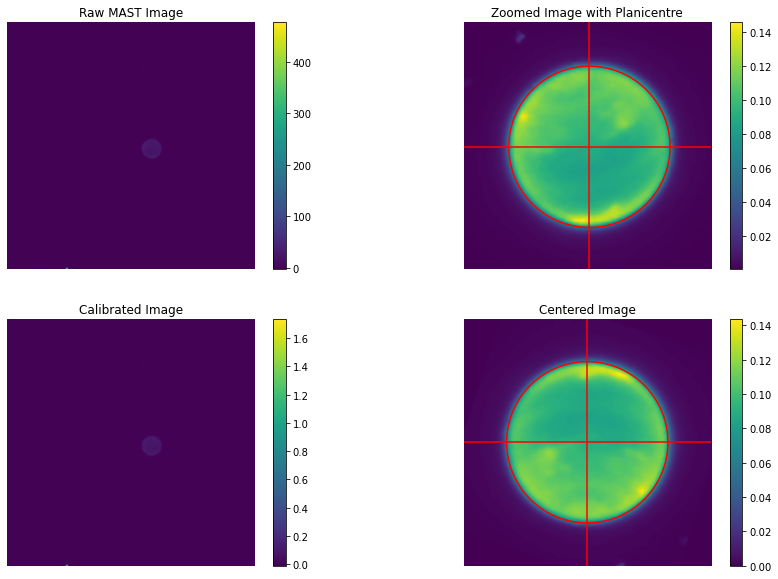

Planicentre is at: (142.53487707261291, 142.5142938822184, 93.3566)


In [36]:
Year = '2006'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_10534_19_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

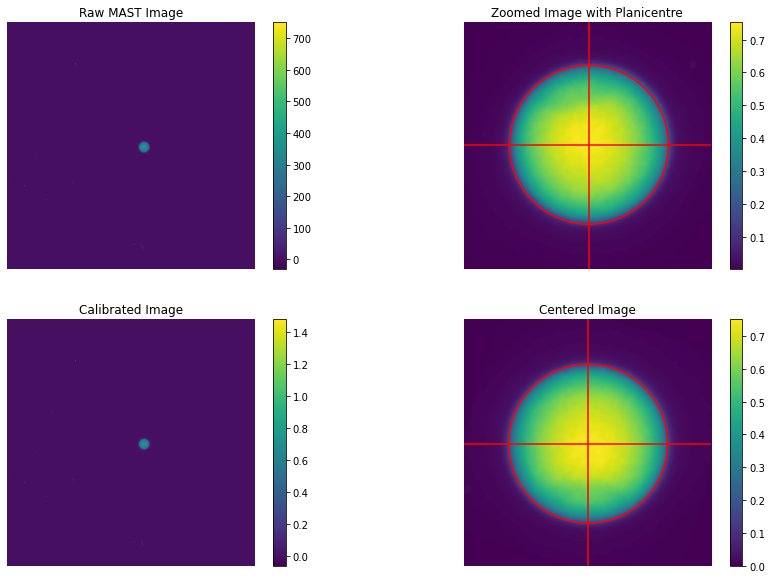

Planicentre is at: (139.46930998502927, 140.03915075080525, 89.45411999999999)


In [37]:
Year = '2005'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_10170_11_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

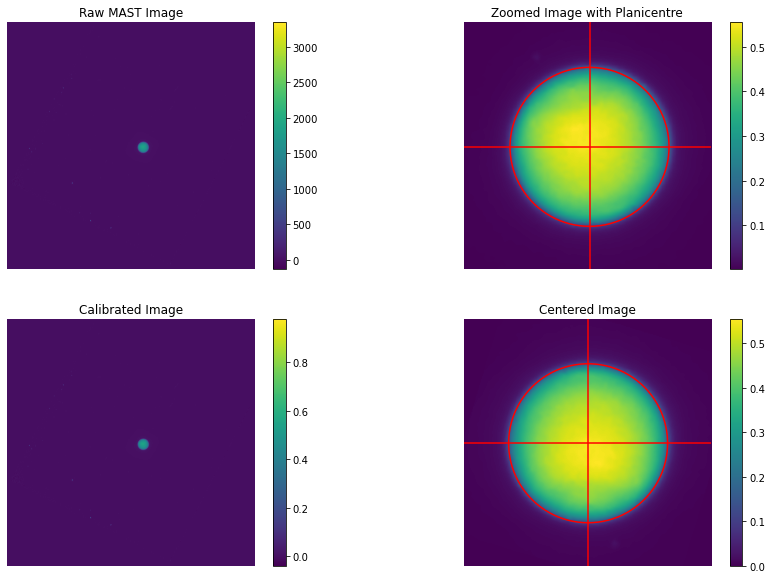

Planicentre is at: (139.42497805092185, 139.6153643546971, 89.4542)


In [38]:
Year = '2005'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_10170_11_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

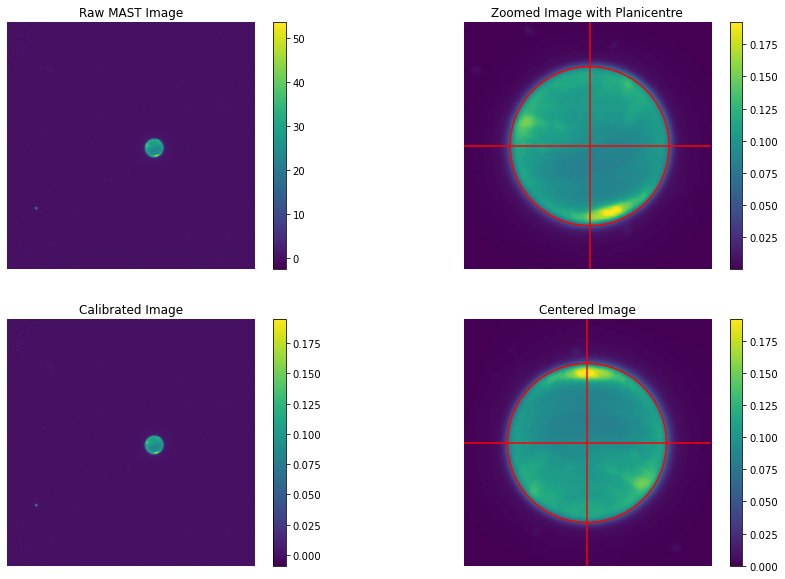

Planicentre is at: (138.11843640606767, 139.30723453908985, 89.45392)


In [39]:
Year = '2005'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_10170_11_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

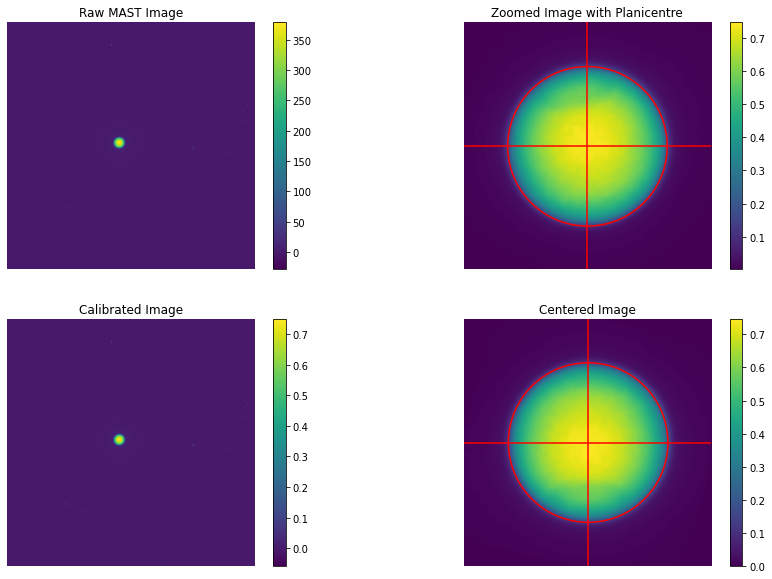

Planicentre is at: (139.4666726756501, 138.8150434900176, 89.7654)


In [40]:
Year = '2004'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_10170_15_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

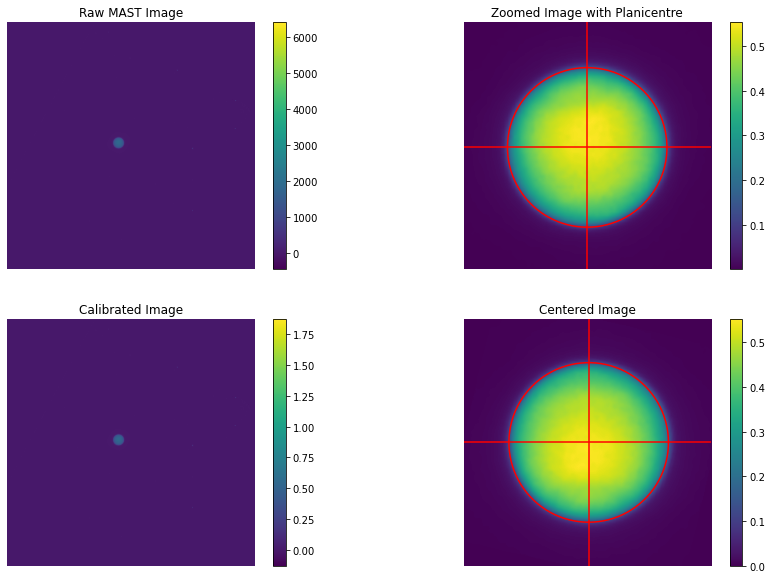

Planicentre is at: (140.0592799232848, 138.6895649899747, 89.76532)


In [41]:
Year = '2004'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_10170_15_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

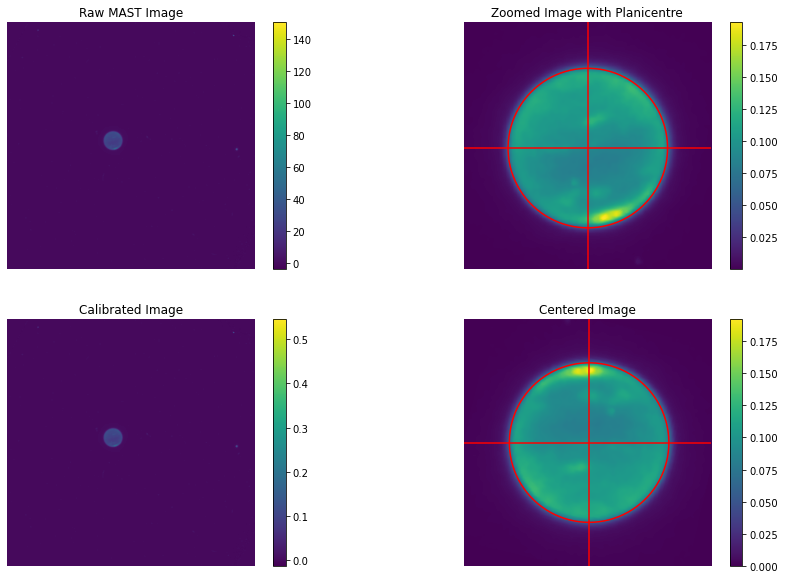

Planicentre is at: (140.52867840049404, 138.85375173691523, 89.76559999999999)


In [42]:
Year = '2004'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_10170_15_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

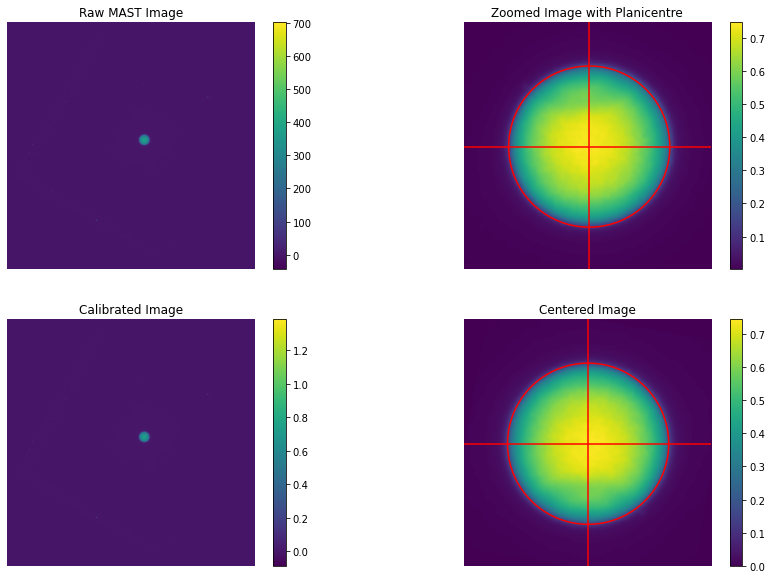

Planicentre is at: (142.4511287731462, 143.1844508328401, 92.6488)


In [43]:
Year = '2001'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_08634_14_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

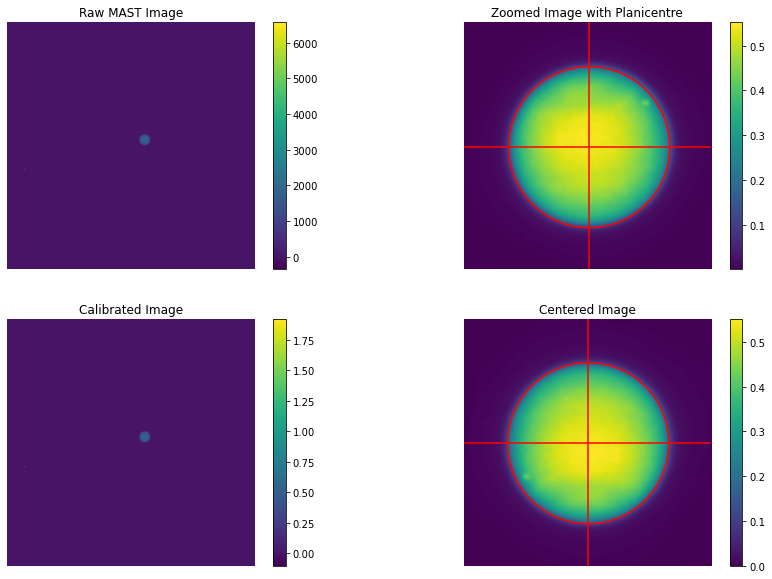

Planicentre is at: (142.59529363617762, 142.56046654389195, 92.64891999999999)


In [44]:
Year = '2001'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_08634_14_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

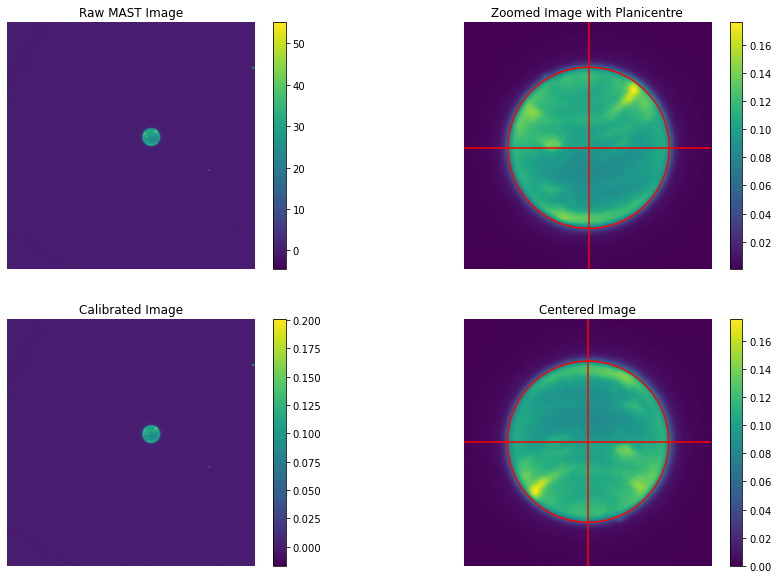

Planicentre is at: (142.31941613278974, 140.87208794408852, 92.64855999999999)


In [45]:
Year = '2001'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_08634_14_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

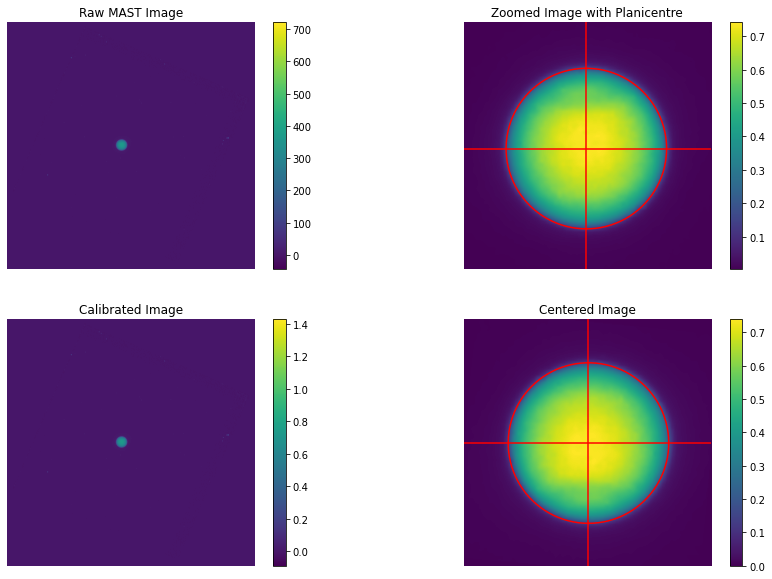

Planicentre is at: (140.84326817482977, 140.40188886448496, 90.97052)


In [46]:
Year = '2000'
wavlng = '467'
SolFlux = 2019.07
Filename = 'hst_08634_08_wfpc2_f467m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

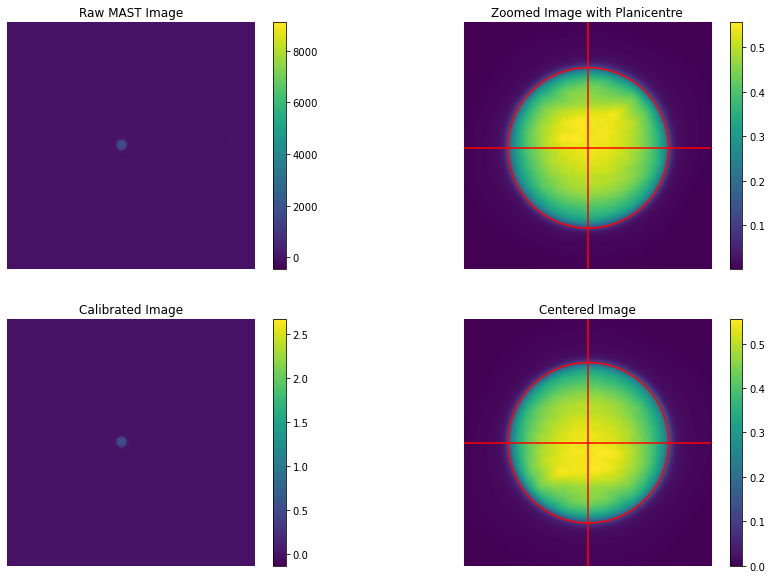

Planicentre is at: (140.69998724977688, 140.02936801394026, 90.9704)


In [47]:
Year = '2000'
wavlng = '547'
SolFlux = 1860.93
Filename = 'hst_08634_08_wfpc2_f547m_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = wavlng)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

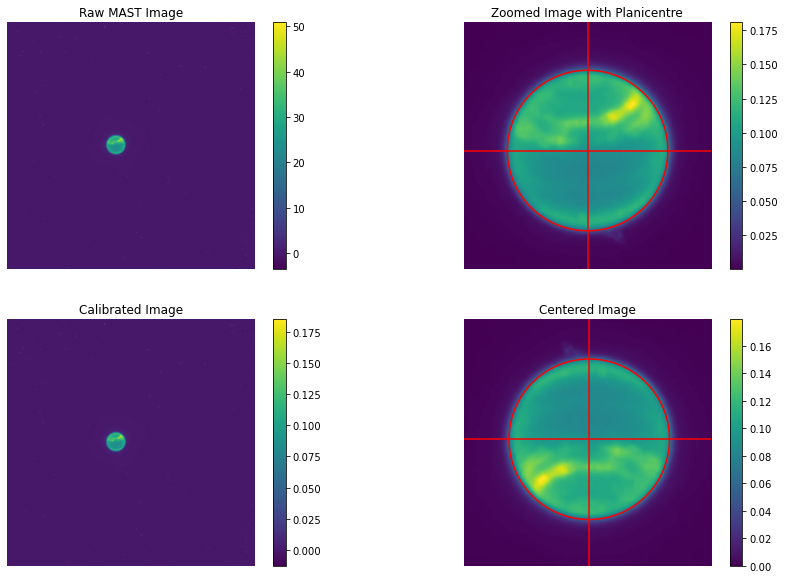

Planicentre is at: (141.68777251184835, 136.09945023696682, 90.97072)


In [48]:
Year = '2000'
wavlng = 'ch4'
SolFlux = 1710.18
Filename = 'hst_08634_08_wfpc2_fqch4n15_pc_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)

IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], SolFlux, PlateScale=0.05, Filter = '619')

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)
ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image
img = ndimage.rotate(img, -1*ang_corr+180, reshape=True)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()

print('Planicentre is at: '+str(planicentre))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')